## Import all

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from embedding_generator.main.embeddings_generator import *

### Load dataset test

In [2]:
dataset = pd.read_csv("../dataset_test/dataset_100_IBAN.csv")

### Preview dataset

In [3]:
dataset.head(5)

,Index,BIC,AccountNumber,CTRYbnk,Name,Address,IsShared,Holder
0,0,XFTGMEJE,GB16GJHO92728727857670,ME,Opmans & Gepa van Bourgondië,NaN,1,Opmans & Gepa van Bourgondië
1,1,XFTGMEJE,GB16GJHO92728727857670,ME,Opmans/& Gepa van Bourgondië,NaN,1,Opmans & Gepa van Bourgondië
2,2,XFTGMEJE,GB16GJHO92728727857670,ME,Opmans & Gepa van Bourgondië,NaN,1,Opmans & Gepa van Bourgondië
3,3,XFTGMEJE,GB16GJHO92728727857670,ME,van de Pol NV,NaN,1,van de Pol NV
4,4,XFTGMEJE,GB16GJHO92728727857670,ME,van de Pol NV,NaN,1,van de Pol NV


### Retrieve all IBANs

In [4]:
iban_list = dataset["AccountNumber"].unique().tolist()

In [5]:
def plot_similarity_matrix(vectors, vector_names, iban, shared):
    """ 
        - assume 'vectors' is a 2D array where each row is a vector
    """
    
    # assume 'vectors' is a list of PyTorch tensors
    vectors = [vector.detach().squeeze().numpy() for vector in vectors]

    # calculate the cosine similarity between each pair of vectors
    similarity_matrix = cosine_similarity(vectors)
    if shared:string_shared = "yes"
    else: string_shared = "no"

    # plot the similarity matrix as a heatmap
    plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
    plt.title("Cosine similarity heatMap for IBAN: " + iban + " shared: " + string_shared)
    plt.xticks(range(len(vector_names)), vector_names, rotation=55, ha='right')
    plt.yticks(range(len(vector_names)), vector_names)
    
    plt.colorbar()
    plt.show()


In [6]:
def get_prettify_infos(iban, holder, shared, vector_names, vector_name_for_holder):
    """ """
    
    vectors_group = [vector.detach().squeeze().numpy() for vector in vector_names]
    similarity_matrix = cosine_similarity(vectors_group)
    
    print()
    print("HOLDER: ", holder)
    print("Names: ", vector_name_for_holder)
    
    sum_similarities = np.sum(similarity_matrix)
    count_similarities = np.count_nonzero(similarity_matrix)
    average_mean_similarity = sum_similarities / count_similarities
    print("Average similarity:", average_mean_similarity)
    
    

### Compute embeddings

IBAN:  GB16GJHO92728727857670
Shared:  yes

HOLDER:  Opmans & Gepa van Bourgondië
Names:  ['Opmans & Gepa van Bourgondië', 'Opmans/& Gepa van Bourgondië', 'Opmans & Gepa van Bourgondië']
Average similarity: 0.9898805618286133

HOLDER:  van de Pol NV
Names:  ['van de Pol NV', 'van de Pol NV']
Average similarity: 1.000000238418579

HOLDER:  Sligro
Names:  ['Sligro']
Average similarity: 1.0000001192092896

HOLDER:  Ridder & Spaan
Names:  ['Ridder & Spaan']
Average similarity: 0.9999998807907104


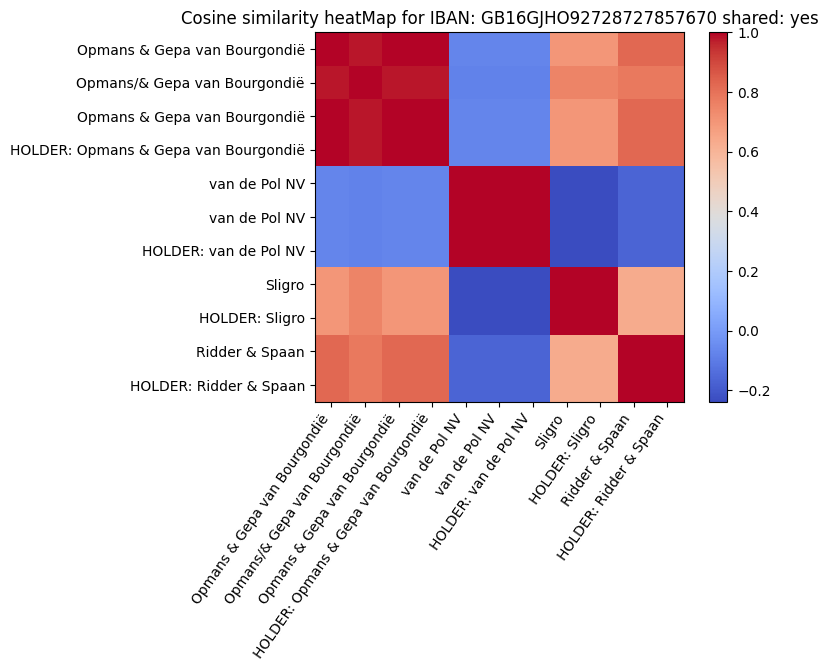

IBAN:  GB04TLXW04081055908712
Shared:  no

HOLDER:  Steenbakkers & Zeemans
Names:  ['Steenbakkers & Zeemans', 'Steenbakkers-& - Zeemans', 'Steenbakkers .& -  Zeemans', 'Steenbakkers,&', 'Steenbakkers/&. Zeemans', 'Steenbakkers- &. Zeemans', 'Steenbakkers/&  - Zeemans', 'Steenbakkers,&', 'Steenbakkers. &. Zeemans', 'Steenbakkers/&,Zeemans']
Average similarity: 0.9351493835449218


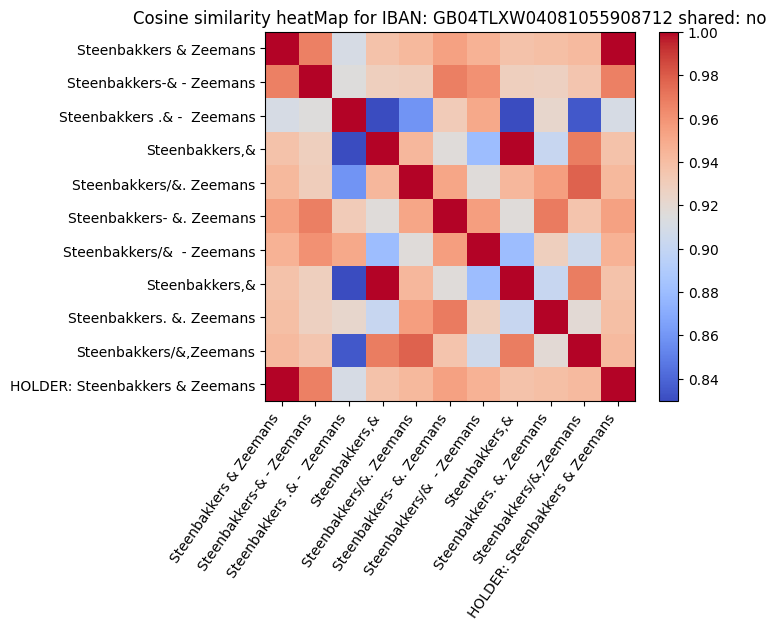

IBAN:  GB47CWYK42262384316627
Shared:  yes

HOLDER:  Heinrich Blümel Stiftung & Co. KG
Names:  ['Heinrich Blümel Stiftung & Co. KG', 'Heinrich Blümel Stiftung & Company KG', 'Heinrich Blümel Stiftung & Comp.']
Average similarity: 0.9839093950059679

HOLDER:  Scheibe
Names:  ['Scheibe']
Average similarity: 1.0

HOLDER:  Hendriks
Names:  ['Hendriks', 'Hendriks', 'Hendriks  S.A.S.']
Average similarity: 0.851266966925727

HOLDER:  Textor
Names:  ['Textor', 'Textor  Hldgs.', 'Textor Holdings', 'Textor Hldgs', 'Textor Holdings', 'Textor - Holdings', 'Textor  Hldgs.', 'Textor Holdings']
Average similarity: 0.8898245096206665

HOLDER:  Schweitzer Hermighausen AG & Co. KG
Names:  ['Schweitzer Hermighausen AG & Co. KG']
Average similarity: 1.0

HOLDER:  Gunpf
Names:  ['Gunpf']
Average similarity: 1.0000001192092896

HOLDER:  Losekann Pechel AG
Names:  ['Losekann Pechel AG']
Average similarity: 0.9999997615814209

HOLDER:  Segebahn OHG mbH
Names:  ['Segebahn OHG mbH', 'Segebahn OHG']
Average simi

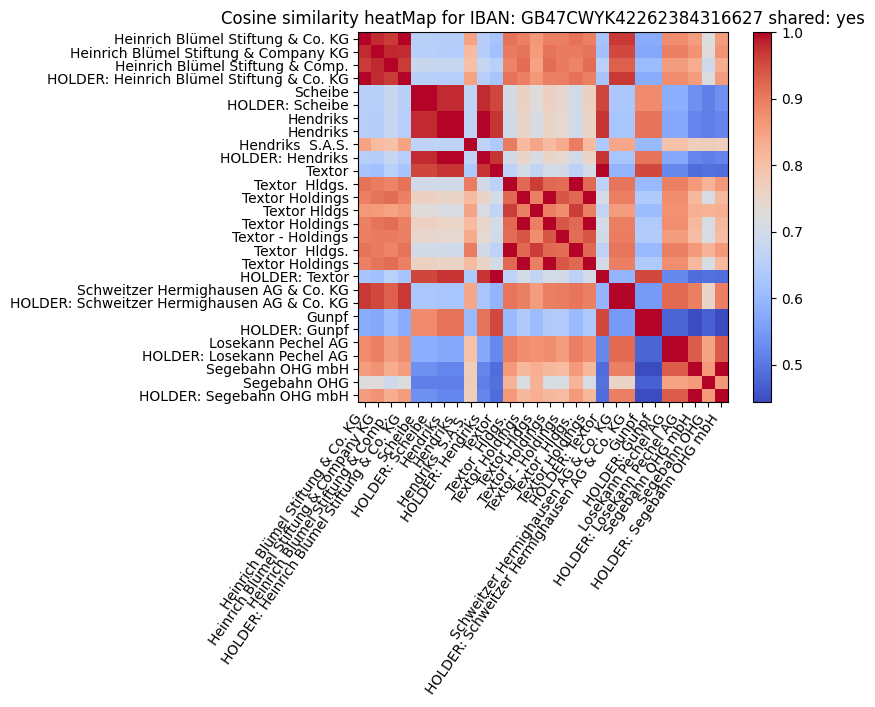

IBAN:  DE26188284792134231184
Shared:  yes

HOLDER:  Sutton, Bruce and Anderson
Names:  ['Sutton, Bruce and Anderson', 'Sutton, Bruce Industries .Anderson']
Average similarity: 0.9775959849357605

HOLDER:  Sykes-Lawrence
Names:  ['Sykes-Lawrence']
Average similarity: 1.0000001192092896

HOLDER:  Ball Inc
Names:  ['Ball Inc', 'Ball']
Average similarity: 0.8521344661712646


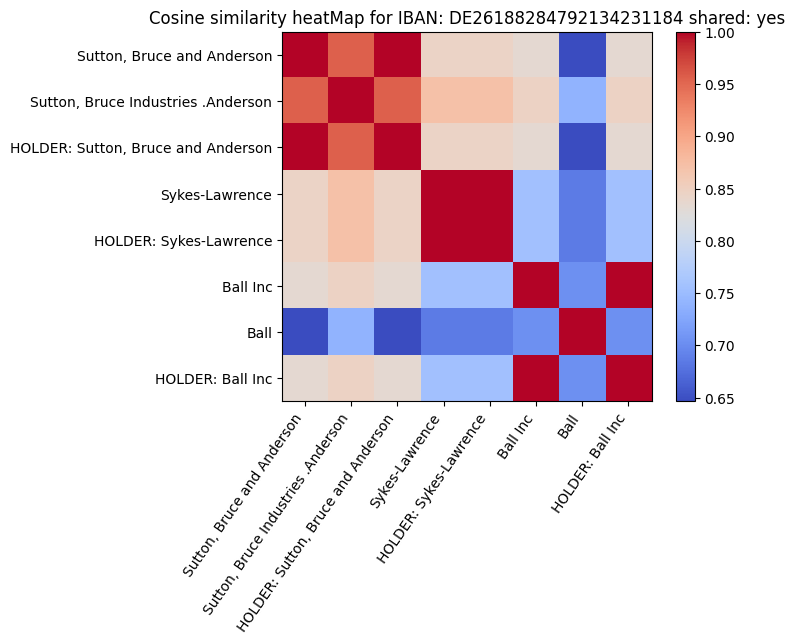

In [7]:
for iban in iban_list[:4]:
    
    vectors = []
    vector_names = []
    holders = dataset["Holder"].loc[dataset["AccountNumber"] == iban]
    shared = dataset["IsShared"].loc[dataset["AccountNumber"] == iban].tolist()[0]
    holders_unique = holders.unique().tolist()
    clusters_index = []
    
    print("IBAN: ", iban)
    print("Shared: ", "yes" if shared else "no")
    
    for holder in holders_unique:
        names = dataset["Name"].loc[(dataset["Holder"] == holder) & (dataset["AccountNumber"] == iban)]
    
        vector_for_holder = []
        vector_name_for_holder = []           
        for name in names.tolist():
            
            vec = create_characterBERT_embeddings_old_version(name)
            vectors.append(vec)
            vector_names.append(name)
            
            vector_for_holder.append(vec)
            vector_name_for_holder.append(name)
            
        
        vectors.append(create_characterBERT_embeddings_old_version(holder))
        vector_names.append("HOLDER: " + holder)
        get_prettify_infos(iban, holder, shared, vector_for_holder, vector_name_for_holder)
        
    
    plot_similarity_matrix(vectors, vector_names, iban, shared)
        


In [3]:
import pandas as pd
dataset = pd.read_csv("../dataset_test/dataset_10000_IBAN.csv")
dataset = dataset.drop("Unnamed: 0", axis=1)

In [4]:
dataset.head(5)

,BIC,AccountNumber,CTRYbnk,Name,Address,IsShared,Holder
0,ARPIPWDC,GB87ASEU67477209721654,PW,Giolitti Dossi e figli,&&,0,Giolitti-Dossi e figli
1,ARPIPWDC,GB87ASEU67477209721654,PW,Giolitti - Dossi e figli,NaN,0,Giolitti-Dossi e figli
2,ARPIPWDC,GB87ASEU67477209721654,PW,Giolitti-Dossi e/figli,NaN,0,Giolitti-Dossi e figli
3,ARPIPWDC,GB87ASEU67477209721654,PW,Giolitti Dossi. e-figli,Marocchi IT,0,Giolitti-Dossi e figli
4,ARPIPWDC,GB87ASEU67477209721654,PW,Giolitti Dossi e .figli,NaN,0,Giolitti-Dossi e figli
